Mobile phone company
==

### *# Import modules*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO

import scipy.stats as stats

import pydot 

import plot_utility as plu

### *# Read data*

In [2]:
data = pd.read_csv('data/churn.csv', quotechar="'", na_values='?')

print('Type:\n', type(data))
print('Shape:\n', data.shape)
print('Attribute list:\n', list(data.columns))
print('Top tuples:\n', data.head(10))

Type:
 <class 'pandas.core.frame.DataFrame'>
Shape:
 (3333, 21)
Attribute list:
 ['State', 'Account Length', 'Area Code', 'Phone', 'Int_l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']
Top tuples:
   State  Account Length  Area Code     Phone Int_l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes    

Data Undestanding - Data exploratory analysis
--

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int_l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB
None


### *# Set types*

In [4]:
for attribute in data.columns:
    if(data[attribute].dtype == np.object):
          data[attribute] = data[attribute].astype('category')

data['Area Code'] = data['Area Code'].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null category
Account Length    3333 non-null int64
Area Code         3333 non-null category
Phone             3333 non-null category
Int_l Plan        3333 non-null category
VMail Plan        3333 non-null category
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null category
dtypes: category(6), float64(8), int64(7)
memory usage: 602.8

In [5]:
print(data.describe(include='all'))

       State  Account Length  Area Code     Phone Int_l Plan VMail Plan  \
count   3333     3333.000000     3333.0      3333       3333       3333   
unique    51             NaN        3.0      3333          2          2   
top       WV             NaN      415.0  422-9964         no         no   
freq     106             NaN     1655.0         1       3010       2411   
mean     NaN      101.064806        NaN       NaN        NaN        NaN   
std      NaN       39.822106        NaN       NaN        NaN        NaN   
min      NaN        1.000000        NaN       NaN        NaN        NaN   
25%      NaN       74.000000        NaN       NaN        NaN        NaN   
50%      NaN      101.000000        NaN       NaN        NaN        NaN   
75%      NaN      127.000000        NaN       NaN        NaN        NaN   
max      NaN      243.000000        NaN       NaN        NaN        NaN   

        VMail Message     Day Mins    Day Calls   Day Charge  ...  \
count     3333.000000  3333.00

### *# Drop the ID*

In [6]:
# remove 'phone'
data.drop('Phone', axis=1, inplace=True)
print(data.shape)
print(data.describe(include='all'))

(3333, 20)
       State  Account Length  Area Code Int_l Plan VMail Plan  VMail Message  \
count   3333     3333.000000     3333.0       3333       3333    3333.000000   
unique    51             NaN        3.0          2          2            NaN   
top       WV             NaN      415.0         no         no            NaN   
freq     106             NaN     1655.0       3010       2411            NaN   
mean     NaN      101.064806        NaN        NaN        NaN       8.099010   
std      NaN       39.822106        NaN        NaN        NaN      13.688365   
min      NaN        1.000000        NaN        NaN        NaN       0.000000   
25%      NaN       74.000000        NaN        NaN        NaN       0.000000   
50%      NaN      101.000000        NaN        NaN        NaN       0.000000   
75%      NaN      127.000000        NaN        NaN        NaN      20.000000   
max      NaN      243.000000        NaN        NaN        NaN      51.000000   

           Day Mins    Day C

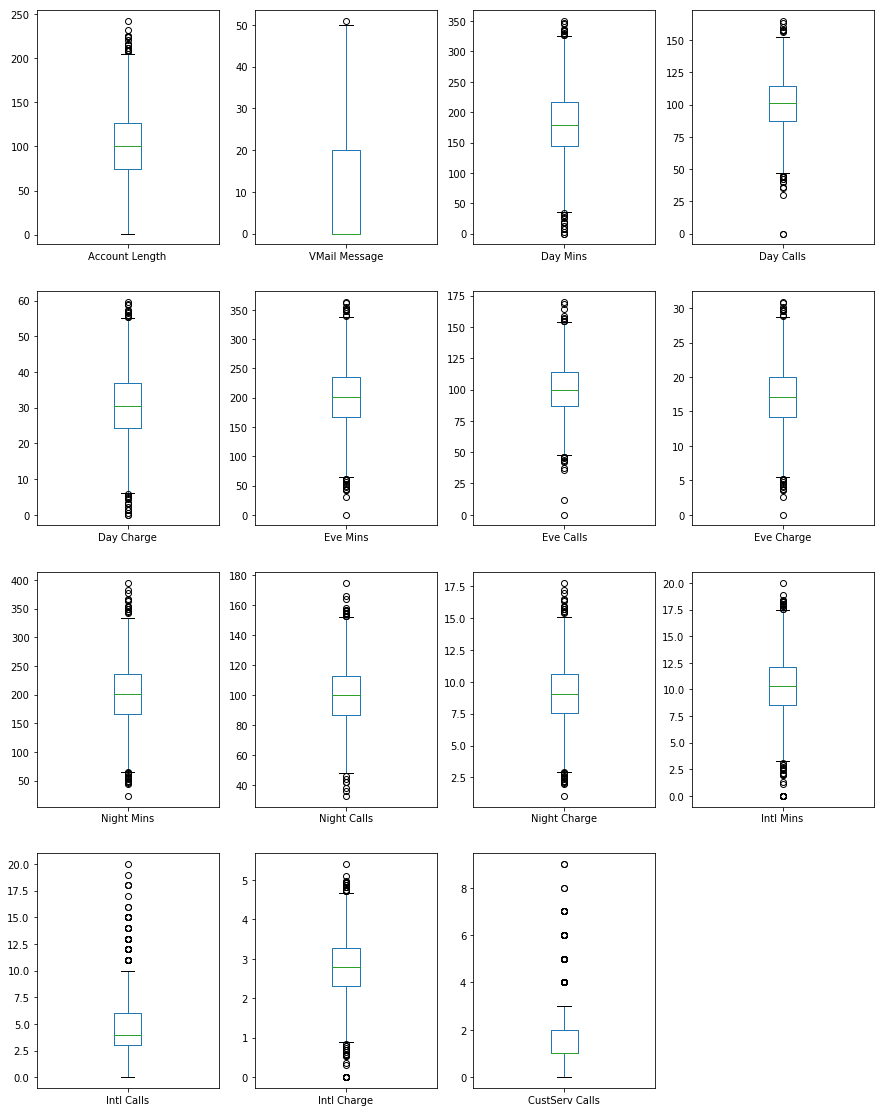

In [7]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 25), layout=(5, 4))
plt.show()

### *# Utility variables*

In [8]:
class_name = 'Churn'
class_values = dict(data.groupby(class_name).size())

i = 0
colors = ['green', 'red']
class_map = dict()
color_map = dict()


for class_value in class_values:
    color_map[class_value] = colors[i]
    class_map[class_value] = i
    i += 1

### *# Plots*

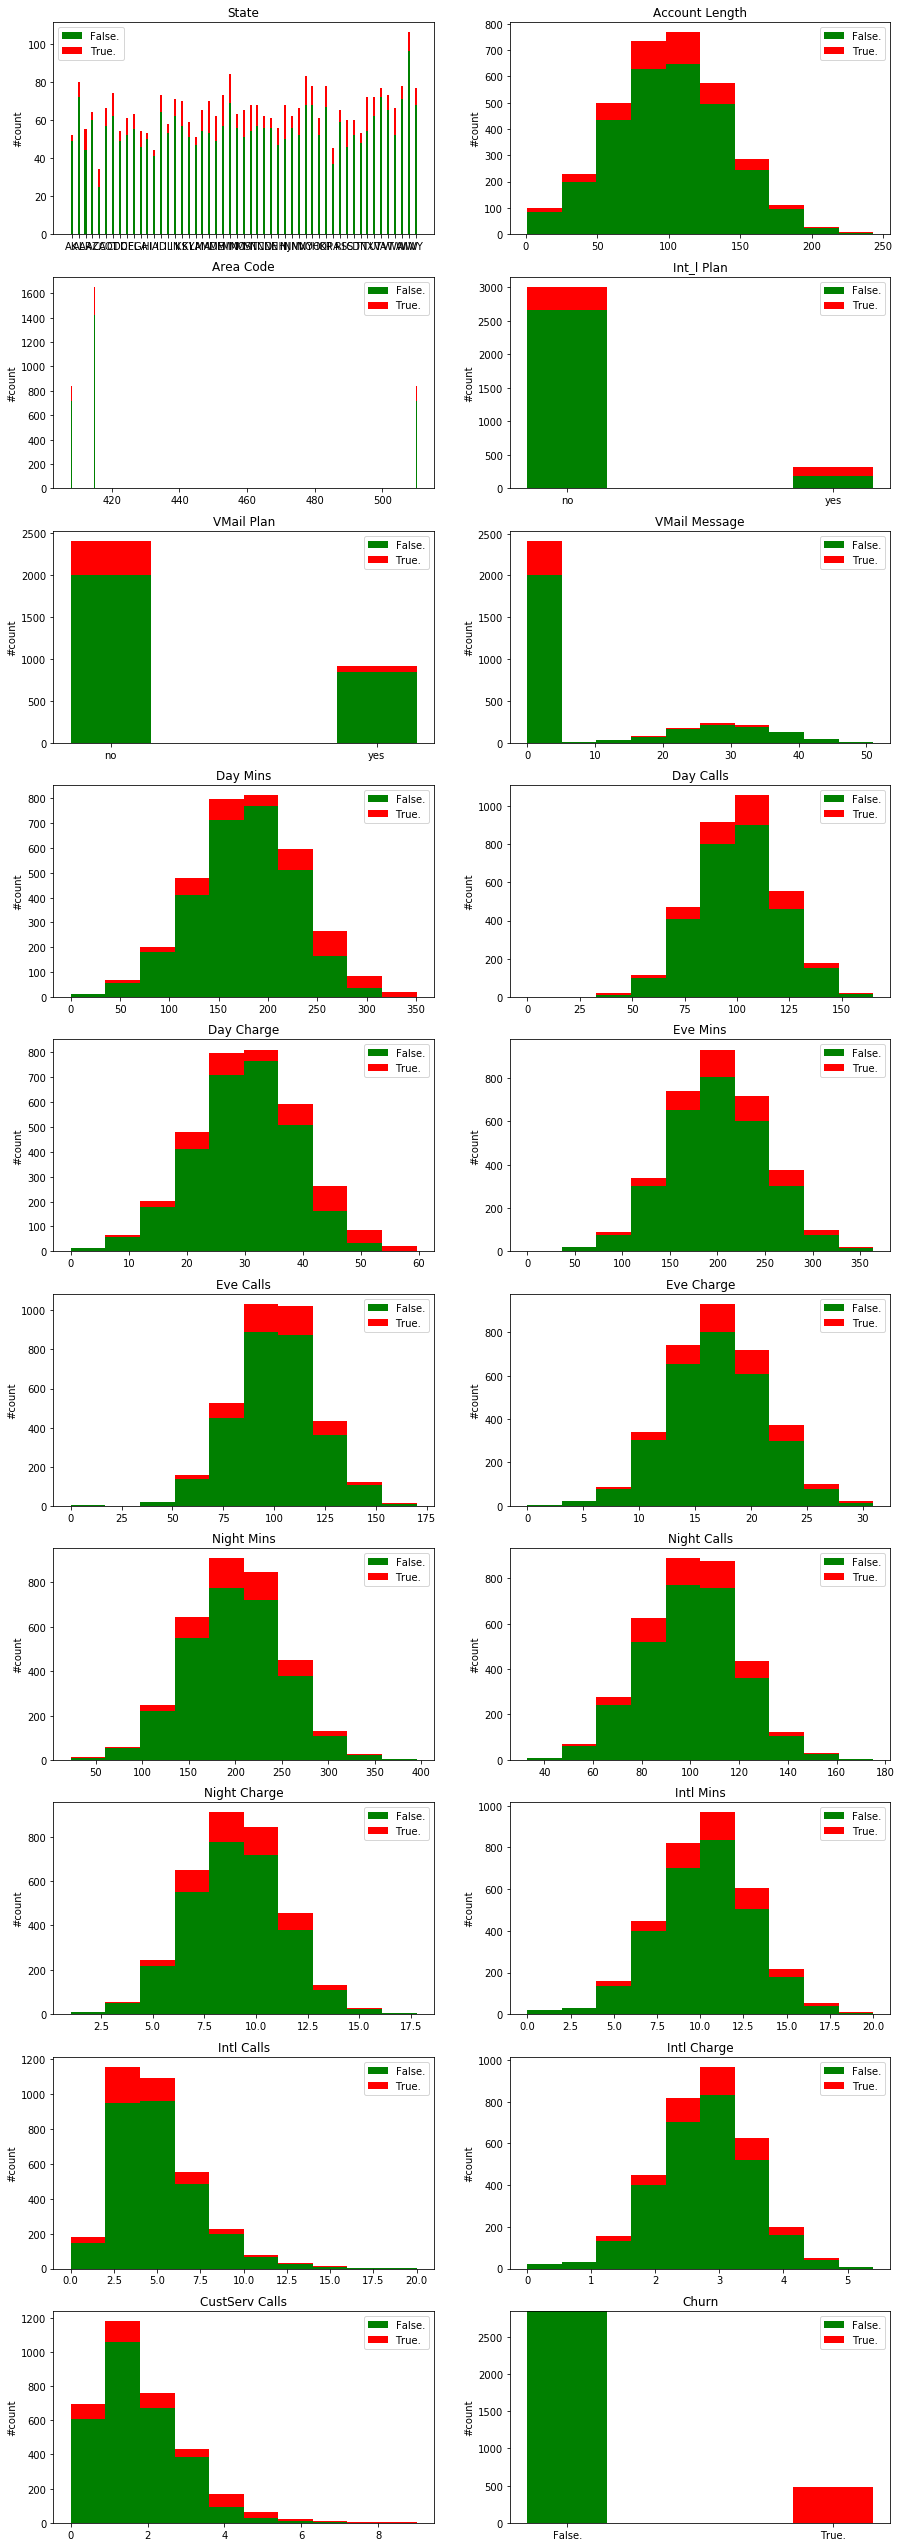

In [9]:
k = 1
n_r = 10
n_c = 2

plt.subplots(n_r, n_c, figsize=(15, 46))

for attribute in data.columns:
    plt.subplot(n_r, n_c, k)

    if(data[attribute].dtype == np.int64 or data[attribute].dtype == np.float64):
        plu.colored_hist(data, class_map, color_map, attribute, class_name, n_bins=10)
    else:
        plu.colored_bar(data, class_map, color_map, attribute, class_name)

    k += 1

plt.show()

In [10]:
def class_dist_plot(data, color_map, attr_name, class_name, bins=50):
    class_grs = data[[attr_name, class_name]].groupby([class_name])
    class_vals = []
    densities = []
    x_vals = []
    
    for class_gr in class_grs:
        class_val = class_gr[0]
        input_data = class_gr[1][attr_name].values
        density = stats.gaussian_kde(input_data)
        n, x_val, _ = plt.hist(input_data, bins, color=color_map[class_val], histtype=u'step', density=True)
        plt.plot(x_val, density(x_val), color='k')
        plt.title('Bar plot - attribute: ' + attr_name + ', class label: ' + class_val)
        plt.ylabel('Density')
        plt.show()
        
        class_vals.append(class_val)
        densities.append(density)
        x_vals.append(x_val)
    
    for i in range(len(class_vals)):
        plt.plot(x_vals[i], densities[i](x_vals[i]), color=color_map[class_vals[i]])
        
    plt.title('Class distributions - ' + attr_name)
    plt.ylabel('Density')
    plt.legend(class_vals)
    plt.show()

In [11]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Int_l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

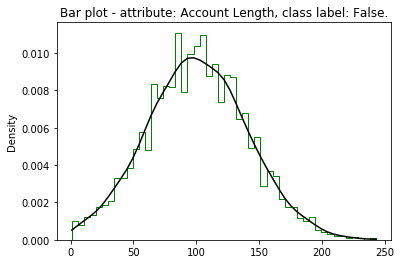

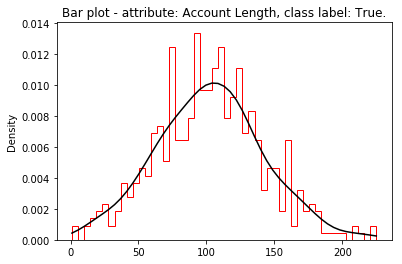

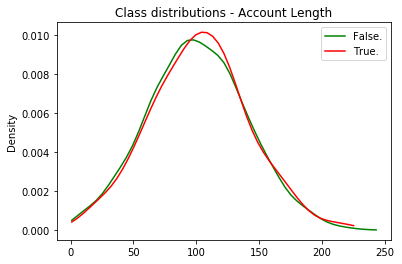

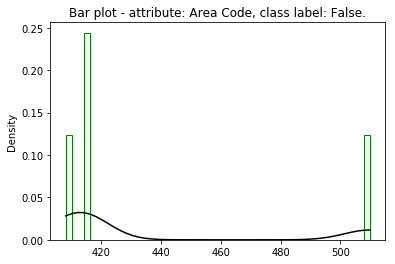

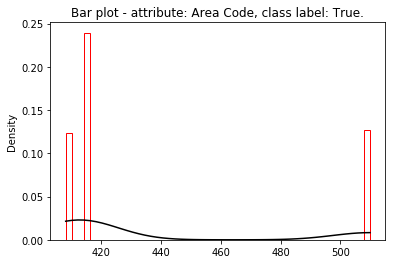

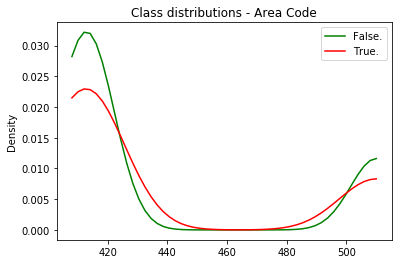

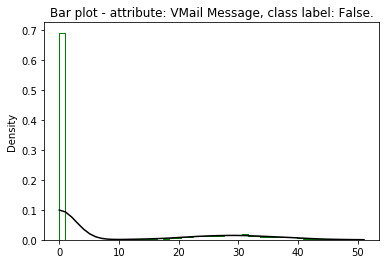

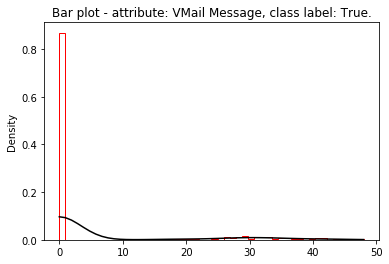

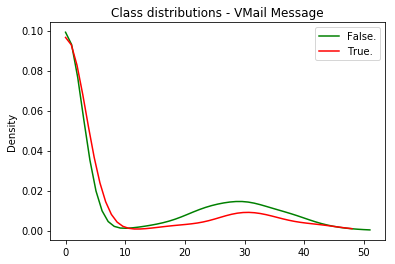

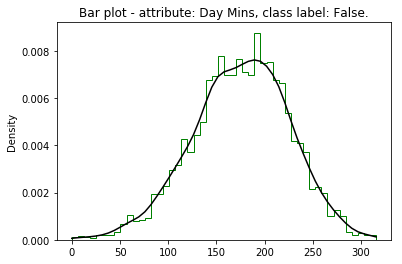

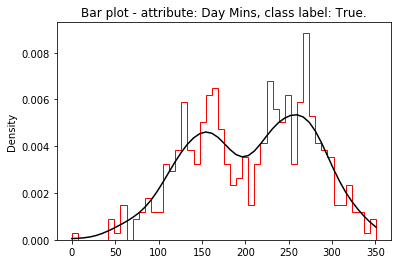

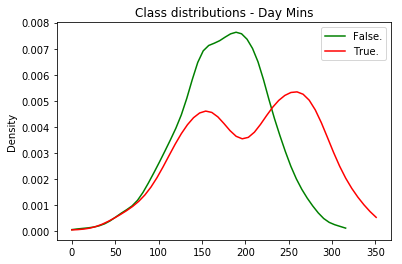

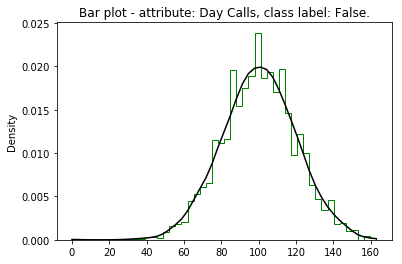

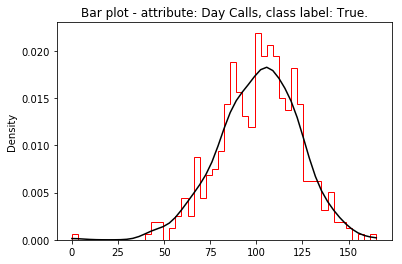

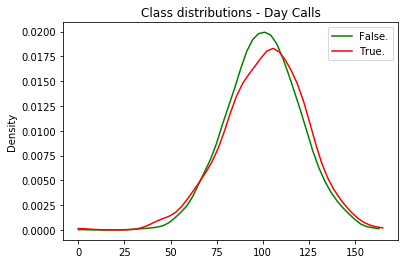

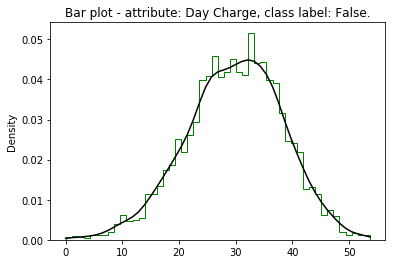

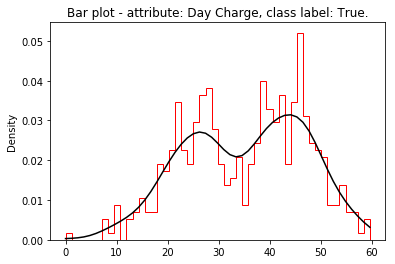

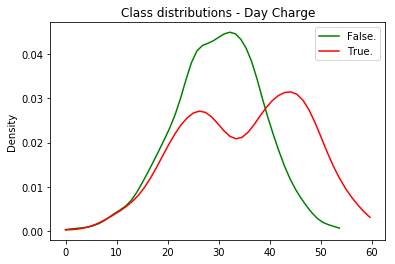

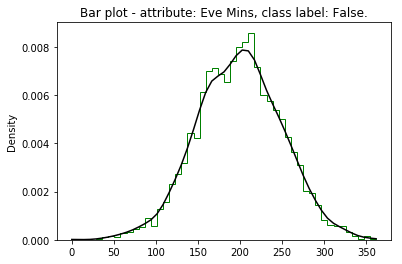

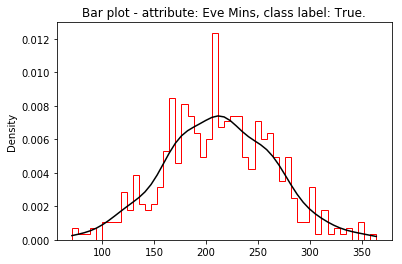

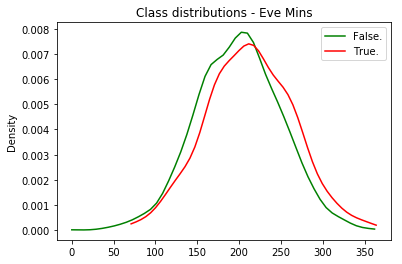

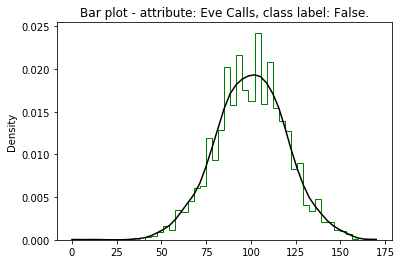

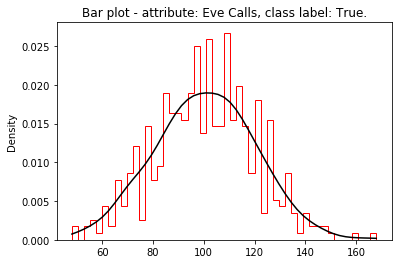

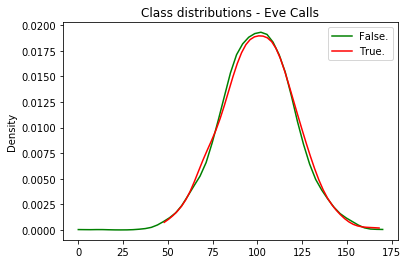

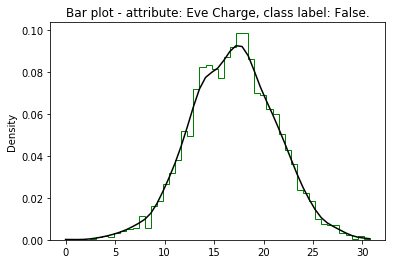

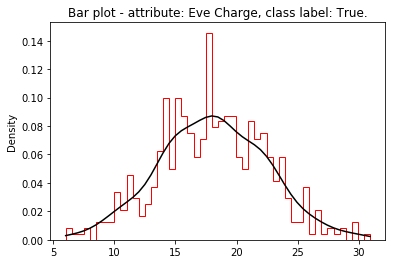

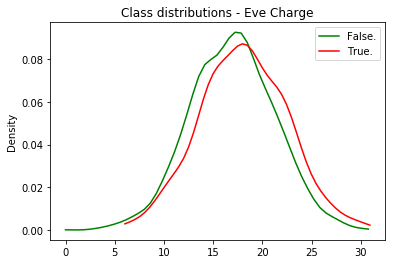

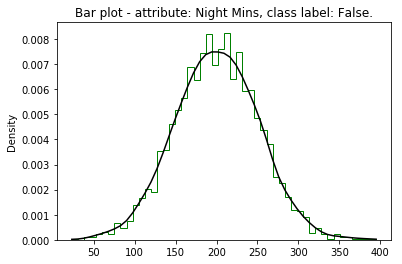

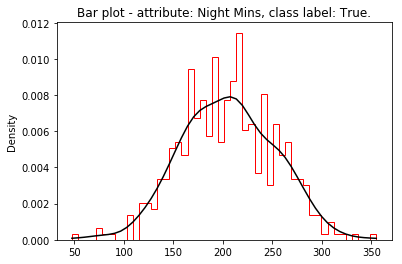

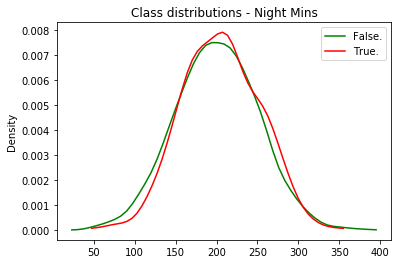

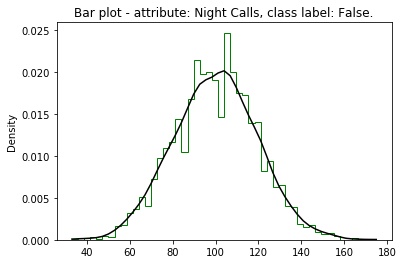

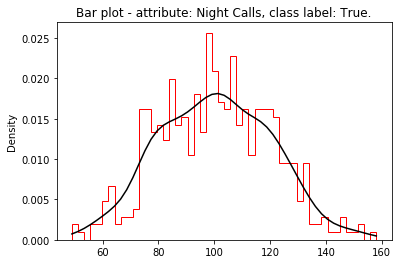

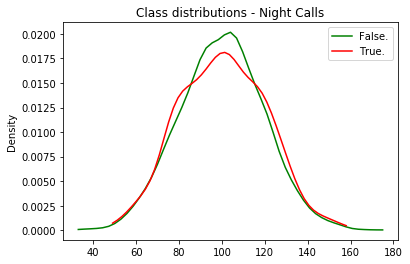

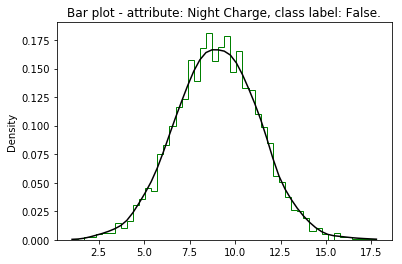

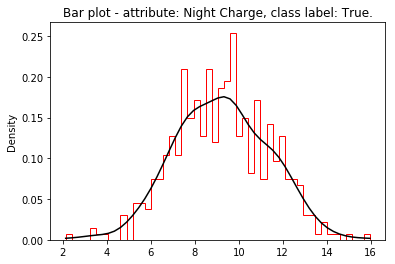

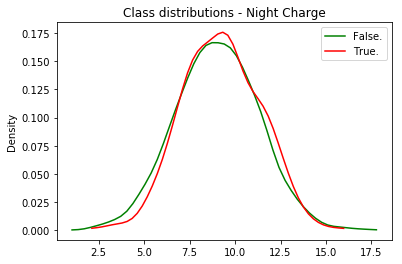

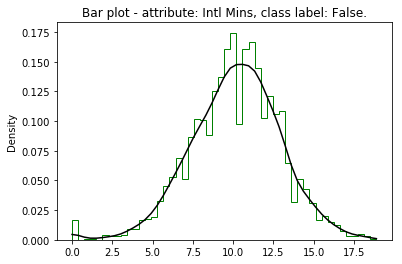

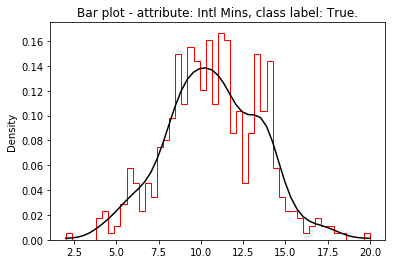

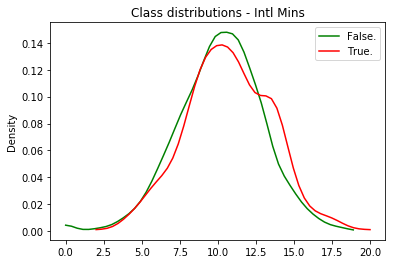

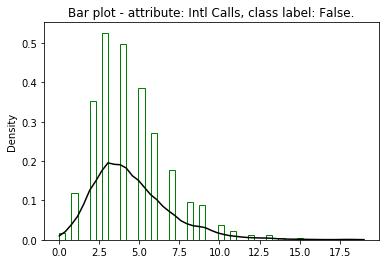

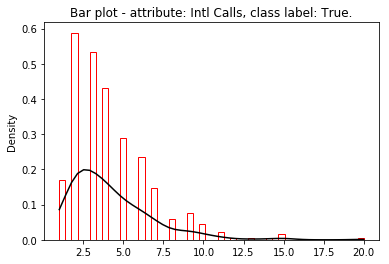

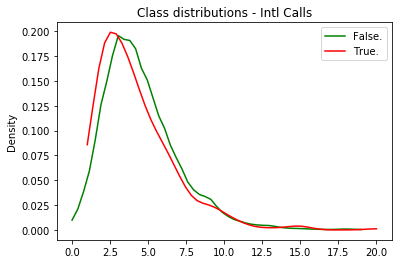

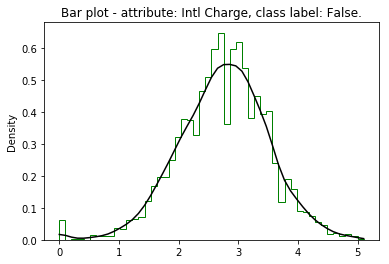

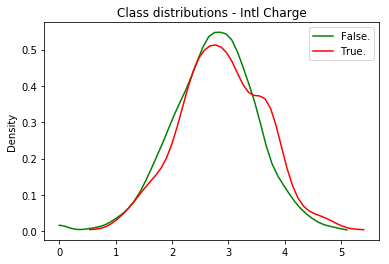

In [12]:
class_dist_plot(data, color_map, 'Account Length', class_name)
class_dist_plot(data, color_map, 'Area Code', class_name)
class_dist_plot(data, color_map, 'VMail Message', class_name)
class_dist_plot(data, color_map, 'Day Mins', class_name)
class_dist_plot(data, color_map, 'Day Calls', class_name)
class_dist_plot(data, color_map, 'Day Charge', class_name)
class_dist_plot(data, color_map, 'Eve Mins', class_name)
class_dist_plot(data, color_map, 'Eve Calls', class_name)
class_dist_plot(data, color_map, 'Eve Charge', class_name)
class_dist_plot(data, color_map, 'Night Mins', class_name)
class_dist_plot(data, color_map, 'Night Calls', class_name)
class_dist_plot(data, color_map, 'Night Charge', class_name)
class_dist_plot(data, color_map, 'Intl Mins', class_name)
class_dist_plot(data, color_map, 'Intl Calls', class_name)
class_dist_plot(data, color_map, 'Intl Charge', class_name)

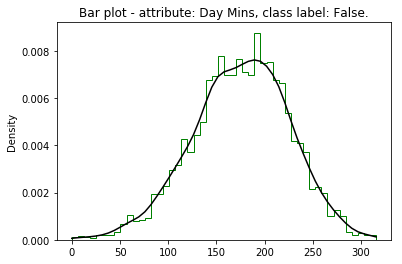

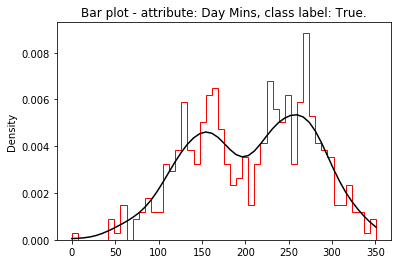

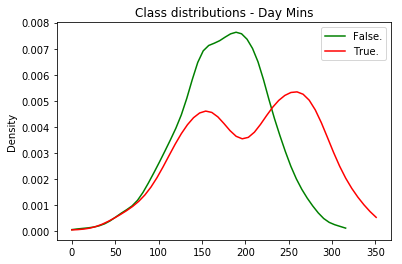

In [13]:
class_dist_plot(data, color_map, 'Day Mins', class_name)

### *# Class distribution*

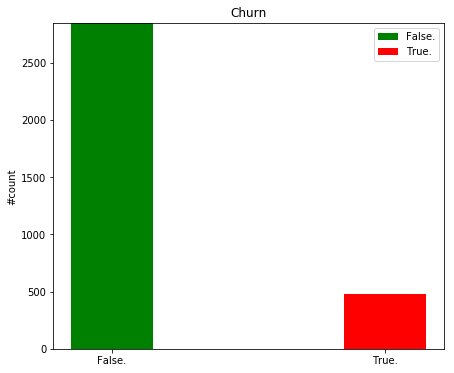

In [14]:
plt.figure(figsize=(7, 6))
plu.colored_bar(data, class_map, color_map, class_name, class_name)
plt.show()

In [15]:
def cross_tabulation(attr_name, class_name, data, class_map, color_map):
    plu.colored_bar(data, class_map, color_map, attr_name, class_name)
    plt.show()

    print(data.groupby([class_name, attr_name]).size())

    print('\nIn percentage % - class perspective\n')
    print(100.0 * data.groupby([class_name, attr_name]).size() / data.groupby(class_name).size())

    print('\nIn percentage % - attribute perspective\n')
    print(100.0 * data.groupby([attr_name, class_name]).size() / data.groupby(attr_name).size())
    print()

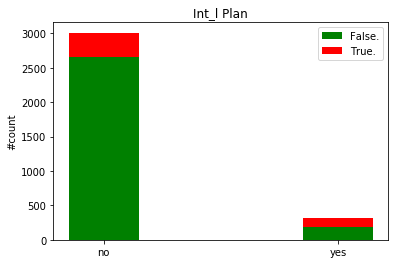

Churn   Int_l Plan
False.  no            2664
        yes            186
True.   no             346
        yes            137
dtype: int64

In percentage % - class perspective

Churn   Int_l Plan
False.  no            93.473684
        yes            6.526316
True.   no            71.635611
        yes           28.364389
dtype: float64

In percentage % - attribute perspective

Int_l Plan  Churn 
no          False.    88.504983
            True.     11.495017
yes         False.    57.585139
            True.     42.414861
dtype: float64



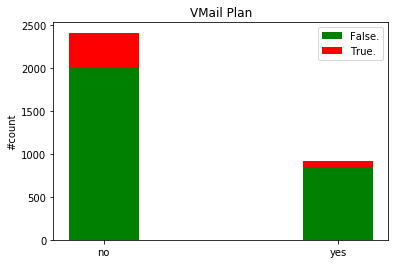

Churn   VMail Plan
False.  no            2008
        yes            842
True.   no             403
        yes             80
dtype: int64

In percentage % - class perspective

Churn   VMail Plan
False.  no            70.456140
        yes           29.543860
True.   no            83.436853
        yes           16.563147
dtype: float64

In percentage % - attribute perspective

VMail Plan  Churn 
no          False.    83.284944
            True.     16.715056
yes         False.    91.323210
            True.      8.676790
dtype: float64



In [16]:
cross_tabulation('Int_l Plan', class_name, data, class_map, color_map)
cross_tabulation('VMail Plan', class_name, data, class_map, color_map)

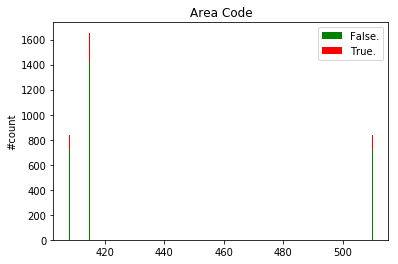

Area Code distinct values: [415, 408, 510]
Area code: 408 Number of distinct states 51
Area code: 408 Distinct states [OH, LA, IA, ID, CO, ..., WI, NV, HI, MO, CT]
Length: 51
Categories (51, object): [OH, LA, IA, ID, ..., NV, HI, MO, CT]
Area code: 415 Number of distinct states 51
Area code: 415 Distinct states [KS, OH, NJ, OK, MO, ..., CT, SD, NC, NH, ND]
Length: 51
Categories (51, object): [KS, OH, NJ, OK, ..., SD, NC, NH, ND]
Area code: 510 Number of distinct states 51
Area code: 510 Distinct states [AL, MA, MT, VT, VA, ..., CT, TN, NC, ND, WA]
Length: 51
Categories (51, object): [AL, MA, MT, VT, ..., TN, NC, ND, WA]


In [17]:
plu.colored_bar(data, class_map, color_map, 'Area Code', class_name)
plt.show()
print('Area Code distinct values:', list(data['Area Code'].unique()))

grs = data.groupby(['Area Code'])

for gr in grs:
    print("Area code:", gr[0], 'Number of distinct states', len(gr[1]['State'].unique()))
    print("Area code:", gr[0], 'Distinct states', gr[1]['State'].unique())

In [18]:
def colored_bar_perc(data, class_map, color_map, attr_name, class_name):
    width = 0.3
    n_cols = len(data[attr_name].unique())
    col_size = list(data.groupby([attr_name]).size())
    p = []
    jj = 0

    for gr in data.groupby(attr_name):
        y_offset = np.zeros(n_cols)
        attr_val = gr[0]
        class_vals = dict(gr[1].groupby(class_name).size())

        for class_val in class_vals:
            val = 100 * class_vals[class_val] / col_size[jj]
            p.append(plt.bar(attr_val, val, width,
                             color=color_map[class_val], bottom=y_offset, align='center'))
            y_offset = y_offset + val
        
        jj += 1

    plt.title(attr_name)
    plt.ylabel('Percentage')
    plt.xlabel('Values')
    plt.legend(p, class_map.keys())

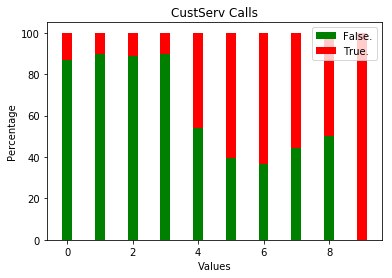

In [19]:
colored_bar_perc(data, class_map, color_map, 'CustServ Calls', class_name)
plt.show()

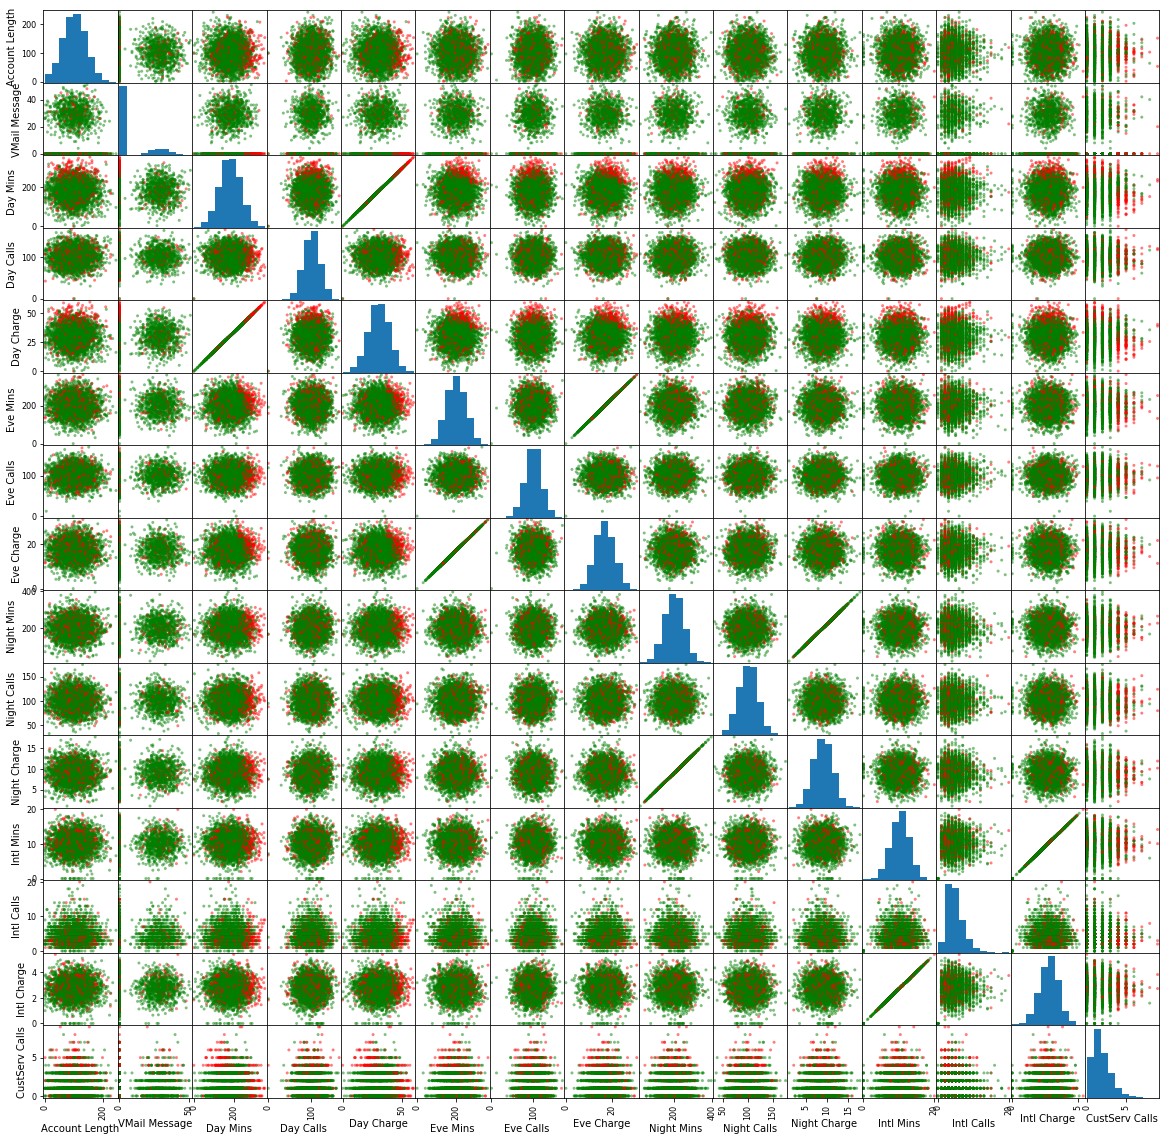

In [20]:
colors = data[class_name].apply(lambda class_val: color_map[class_val])
pd.plotting.scatter_matrix(data, figsize=(20, 20), color=colors)
plt.show()

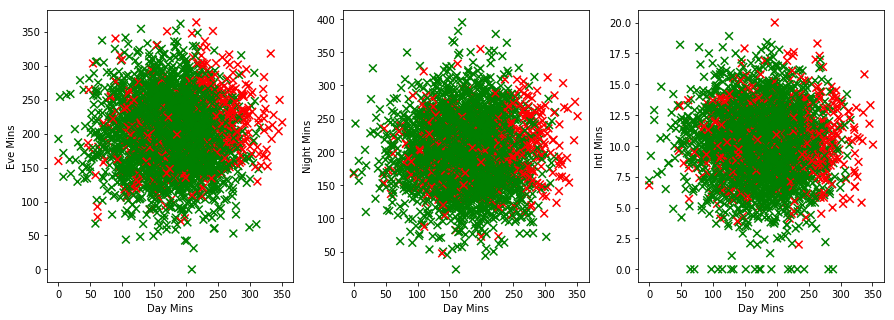

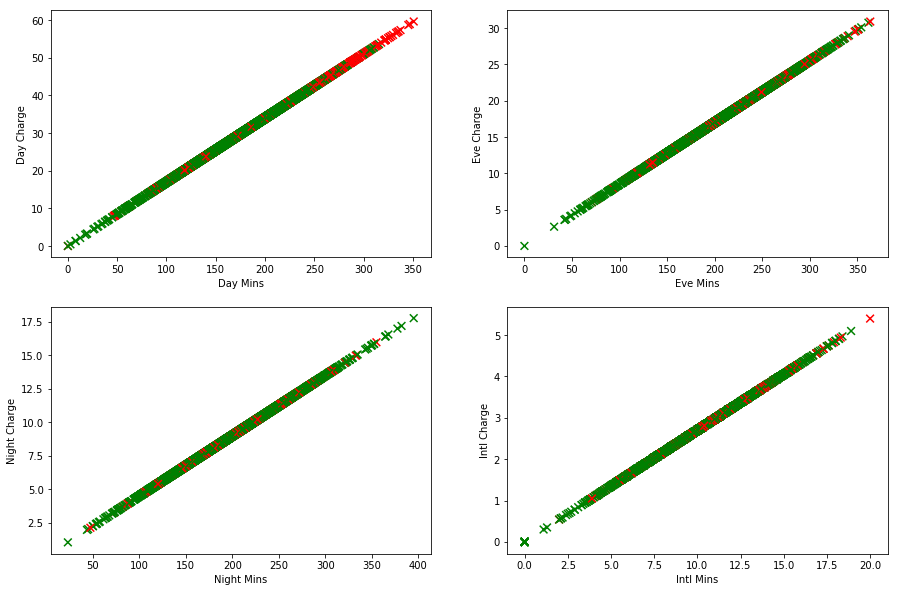

In [21]:
plt.subplots(1,  3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plu.colored_scatter(data, 'Day Mins', 'Eve Mins', colors)

plt.subplot(1, 3, 2)
plu.colored_scatter(data, 'Day Mins', 'Night Mins', colors)

plt.subplot(1, 3, 3)
plu.colored_scatter(data, 'Day Mins', 'Intl Mins', colors)

plt.show()

plt.subplots(2,  2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plu.colored_scatter(data, 'Day Mins', 'Day Charge', colors)

plt.subplot(2, 2, 2)
plu.colored_scatter(data, 'Eve Mins', 'Eve Charge', colors)

plt.subplot(2, 2, 3)
plu.colored_scatter(data, 'Night Mins', 'Night Charge', colors)

plt.subplot(2, 2, 4)
plu.colored_scatter(data, 'Intl Mins', 'Intl Charge', colors)
plt.show()

Data preparation
--

### *# Summary*

| Attribute                     | Description                                   |
|------------------------------	|----------------------------------------------	|
| State                        	| No visible relation with the class attribute 	|
| Account length               	| No visible relation with the class attribute 	|
| Area code                    	| Anomalous, removed                           	|
| Phone number                 	| ID, removed                                  	|
| International Plan           	| Good predictor                               	|
| VoiceMail Plan               	| Good predictor                               	|
| Number of voce mail messages 	| Good predictor 	|
| Total day minutes            	| Good predictor                               	|
| Total day calls              	| No visible relation with the class attribute 	|
| Total day charges            	| Redundant, removed                           	|
| Total evening minutes        	| Good predictor                               	|
| Total evening calls          	| No visible relation with the class attribute 	|
| Total evening charges        	| Redundant, removed                           	|
| Total night minutes          	| No visible relation with the class attribute 	|
| Total night calls            	| No visible relation with the class attribute 	|
| Total night charges          	| Redundant, removed                           	|
| Total international minutes  	| No visible relation with the class attribute 	|
| Total international calls    	| No visible relation with the class attribute 	|
| Total international charges  	| Redundant, removed                           	|
| Customer service calls       	| Good predictor                               	|
| Churn                        	| Class attribute                              	|

In [22]:
print(data.columns)
print(len(data.columns))

Index(['State', 'Account Length', 'Area Code', 'Int_l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')
20


### *# Remove useless attributes*

In [23]:
data = data[['State', 'Account Length', 'Int_l Plan', 'VMail Plan',
             'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
             'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins',
             'Intl Calls', 'CustServ Calls', 'Churn']]

### *# Discretize CustServ Calls*

In [24]:
data['CustServCallsFreq'] = pd.cut(data['CustServ Calls'].values, bins=(-0.1, 3.5, 9), labels=('Low', 'High'))
data['CustServCallsFreq'] = data['CustServCallsFreq'].astype('category')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
State                3333 non-null category
Account Length       3333 non-null int64
Int_l Plan           3333 non-null category
VMail Plan           3333 non-null category
VMail Message        3333 non-null int64
Day Mins             3333 non-null float64
Day Calls            3333 non-null int64
Eve Mins             3333 non-null float64
Eve Calls            3333 non-null int64
Night Mins           3333 non-null float64
Night Calls          3333 non-null int64
Intl Mins            3333 non-null float64
Intl Calls           3333 non-null int64
CustServ Calls       3333 non-null int64
Churn                3333 non-null category
CustServCallsFreq    3333 non-null category
dtypes: category(5), float64(4), int64(7)
memory usage: 306.1 KB


Modeling
--

### *# Binarize the dataset*

In [26]:
categorical_attributes = list(data.select_dtypes(include=["category"]).columns)
categorical_attributes.remove(class_name)
data2 = pd.get_dummies(data, columns=categorical_attributes)
new_attr_list = list(data2.columns)
new_attr_list.remove(class_name)
data2 = data2[new_attr_list]
print(data2.head(10))

   Account Length  VMail Message  Day Mins  Day Calls  Eve Mins  Eve Calls  \
0             128             25     265.1        110     197.4         99   
1             107             26     161.6        123     195.5        103   
2             137              0     243.4        114     121.2        110   
3              84              0     299.4         71      61.9         88   
4              75              0     166.7        113     148.3        122   
5             118              0     223.4         98     220.6        101   
6             121             24     218.2         88     348.5        108   
7             147              0     157.0         79     103.1         94   
8             117              0     184.5         97     351.6         80   
9             141             37     258.6         84     222.0        111   

   Night Mins  Night Calls  Intl Mins  Intl Calls  ...  State_WA  State_WI  \
0       244.7           91       10.0           3  ...         

### *# Split-out validation dataset*

In [27]:
X = np.array(data2.values)

Y = np.array(data[class_name].values)
validation_size = 0.20
seed = 121

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

### *# Create the models*

In [28]:
models = []
models.append(('RIPPER', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', min_samples_leaf=3)))
models.append(('GaussianNaiveBayes', GaussianNB()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RIPPER: 0.923497 (0.015505)
CART: 0.927611 (0.015346)
GaussianNaiveBayes: 0.613637 (0.039318)


Evaluation
--

### *# Model comparison*

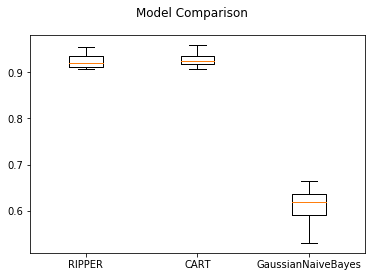

In [29]:
fig = plt.figure()
fig.suptitle('Model Comparison')
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names)
plt.show()

### *# Do predictions on test set*

In [30]:
model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=3)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('Accuracy:', accuracy_score(Y_validation, predictions))
print()
print()
print('Confusion matrix:')
print(confusion_matrix(Y_validation, predictions))
print()
print()
print('Classification report')
print(classification_report(Y_validation, predictions))

Accuracy: 0.9430284857571214


Confusion matrix:
[[549  18]
 [ 20  80]]


Classification report
              precision    recall  f1-score   support

      False.       0.96      0.97      0.97       567
       True.       0.82      0.80      0.81       100

   micro avg       0.94      0.94      0.94       667
   macro avg       0.89      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667



# How different classifiers work

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

(the code can be found [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)!)

### *# Compute the Roc Curve for each class*

In [31]:
from sklearn.metrics import roc_curve, auc


def plot_roc(X_train, Y_train, X_validation, Y_validation, class_map, models):
    class_assingments = [class_map[class_val] for class_val in Y_validation]
    one_hot_encoding = np.zeros((len(Y_validation), len(class_map)))
    one_hot_encoding[range(len(class_assingments)), class_assingments] = 1

    probs = []

    for _, model in models:
        model.fit(X_train, Y_train)
        probs.append(model.predict_proba(X_validation))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    lw = 0.5

    for i in range(len(class_map)):
        plt.figure()
        m = 0

        for name, _ in models:
            fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

            plt.plot(fpr[i], tpr[i], lw=lw, label=name + ' (area = %0.2f)' % roc_auc[i])
            m += 1

        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Class = ' + list(class_map.keys())[i])
        plt.legend(loc="lower right")

        plt.show()

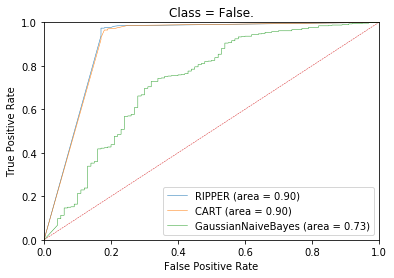

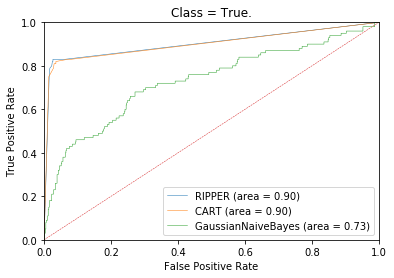

In [32]:
plot_roc(X_train, Y_train, X_validation, Y_validation, class_map, models)

# How different clusterers work

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

(the code can be found [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)!)
(a useful link can be found [here](https://scikit-learn.org/stable/modules/clustering.html)!)

In [33]:
# Compute confusion matrix
def custom_confusion_matrix(act_labels, pred_labels):
    uniqueLabels = list(set(act_labels))
    clusters = list(set(pred_labels))
    cm = np.zeros(shape=(len(uniqueLabels), len(clusters)), dtype=np.int32)
    
    for i, act_label in enumerate(uniqueLabels):
        for j, pred_label in enumerate(pred_labels):
            if act_labels[j] == act_label:
                cm[i][pred_label] = cm[i][pred_label] + 1
    
    return cm

In [34]:
def clustering_stats(kmeans, class_map, Y_train, X_validation, Y_validation):
    class_assingments = np.array([class_map[class_val] for class_val in Y_train])
    print('\tConfusion matrix on training set:')
    print(custom_confusion_matrix(class_assingments, kmeans.labels_))
    print()
    class_assingments = np.array([class_map[class_val] for class_val in Y_validation])
    print('\tConfusion matrix on validation set:')
    print(custom_confusion_matrix(class_assingments, kmeans.predict(X_validation)))
    print()
    print()

In [35]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=2, random_state=101).fit(X_train)
kmeans_2 = KMeans(n_clusters=4, random_state=6541).fit(X_train)
kmeans_3 = KMeans(n_clusters=8, random_state=53452).fit(X_train)
kmeans_4 = KMeans(n_clusters=16, random_state=7).fit(X_train)

print('Stats for kmeans_1')
clustering_stats(kmeans_1, class_map, Y_train, X_validation, Y_validation)
print('Stats for kmeans_2')
clustering_stats(kmeans_2, class_map, Y_train, X_validation, Y_validation)
print('Stats for kmeans_3')
clustering_stats(kmeans_3, class_map, Y_train, X_validation, Y_validation)
print('Stats for kmeans_4')
clustering_stats(kmeans_4, class_map, Y_train, X_validation, Y_validation)

Stats for kmeans_1
	Confusion matrix on training set:
[[1205 1078]
 [ 158  225]]

	Confusion matrix on validation set:
[[295 272]
 [ 34  66]]


Stats for kmeans_2
	Confusion matrix on training set:
[[529 595 594 565]
 [150  69  84  80]]

	Confusion matrix on validation set:
[[126 159 128 154]
 [ 40  19  17  24]]


Stats for kmeans_3
	Confusion matrix on training set:
[[301 227 304 225 325 301 310 290]
 [ 71  28  33 105  41  29  32  44]]

	Confusion matrix on validation set:
[[78 49 78 48 83 71 85 75]
 [29  5 12 24 11  8  5  6]]


Stats for kmeans_4
	Confusion matrix on training set:
[[198 168 126 179 150 124 159  64 128 142 153 118 128  93 130 223]
 [ 21  23  20  27   9  22  25  93  19  13  17  10  23  38  10  13]]

	Confusion matrix on validation set:
[[56 47 39 40 35 29 36 12 33 35 31 32 25 25 27 65]
 [ 5  8  6  5  3  5  5 23  3  1  3  5  3 13  6  6]]




### *# Print the centroids*

In [36]:
print(kmeans_1.cluster_centers_)

[[1.02077149e+02 7.84276267e+00 1.36592212e+02 1.00561352e+02
  2.01583174e+02 9.99162381e+01 2.02197722e+02 9.95451874e+01
  1.02548861e+01 4.50991918e+00 1.60911095e+00 1.46950771e-02
  1.91036003e-02 1.83688464e-02 2.35121234e-02 9.55180015e-03
  1.98383542e-02 2.35121234e-02 1.98383542e-02 1.76340926e-02
  1.91036003e-02 1.46950771e-02 1.68993387e-02 1.32255694e-02
  2.13078619e-02 1.76340926e-02 1.54298310e-02 1.68993387e-02
  2.35121234e-02 1.68993387e-02 1.76340926e-02 1.61645849e-02
  1.68993387e-02 1.98383542e-02 2.35121234e-02 2.13078619e-02
  2.64511389e-02 2.64511389e-02 1.68993387e-02 1.76340926e-02
  1.76340926e-02 1.46950771e-02 1.54298310e-02 1.98383542e-02
  2.42468773e-02 3.01249082e-02 1.83688464e-02 1.98383542e-02
  2.42468773e-02 1.10213079e-02 2.05731080e-02 2.27773696e-02
  1.61645849e-02 1.83688464e-02 1.83688464e-02 1.68993387e-02
  2.57163850e-02 2.05731080e-02 2.13078619e-02 2.20426157e-02
  3.15944159e-02 2.57163850e-02 9.14768553e-01 8.52314475e-02
  7.2814

In [38]:
print(X_train.shape)

(2666, 68)


### *# Split dataset and compute stats*

In [37]:
selected = np.argwhere(kmeans_1.labels_ == 1)
cluster_1 = X_train[selected].reshape(len(selected), X_train.shape[1])
cluster_1_labels = Y_train[selected].reshape(len(selected))

tmp_dict = dict()

for i in range(cluster_1.shape[1]):
    tmp_dict[i] = cluster_1[:, i]

tmp_dict[cluster_1.shape[1]] = cluster_1_labels

cluster_df = pd.DataFrame(tmp_dict)
new_attr_list_df = list(data2.columns)
new_attr_list_df.append(class_name)
cluster_df.columns = new_attr_list_df

print(cluster_df.head())

   Account Length  VMail Message  Day Mins  Day Calls  Eve Mins  Eve Calls  \
0           189.0            0.0     219.9       80.0     143.3      117.0   
1           116.0           35.0     182.8      122.0     212.7      119.0   
2            51.0            0.0     229.7      129.0     336.0      104.0   
3            70.0           24.0     249.5      101.0     259.7       98.0   
4            84.0            0.0     280.0      113.0     202.2       90.0   

   Night Mins  Night Calls  Intl Mins  Intl Calls  ...  State_WI  State_WV  \
0       130.6         69.0       11.7         7.0  ...       0.0       0.0   
1       193.8        103.0       11.0         2.0  ...       0.0       0.0   
2       192.8        128.0        9.6         1.0  ...       0.0       0.0   
3       222.7         68.0        9.8         4.0  ...       0.0       0.0   
4       156.8        103.0       10.4         4.0  ...       0.0       0.0   

   State_WY  Int_l Plan_no  Int_l Plan_yes  VMail Plan_no  VMa

### *# Now you can compute all the statistics on this DataFrame*